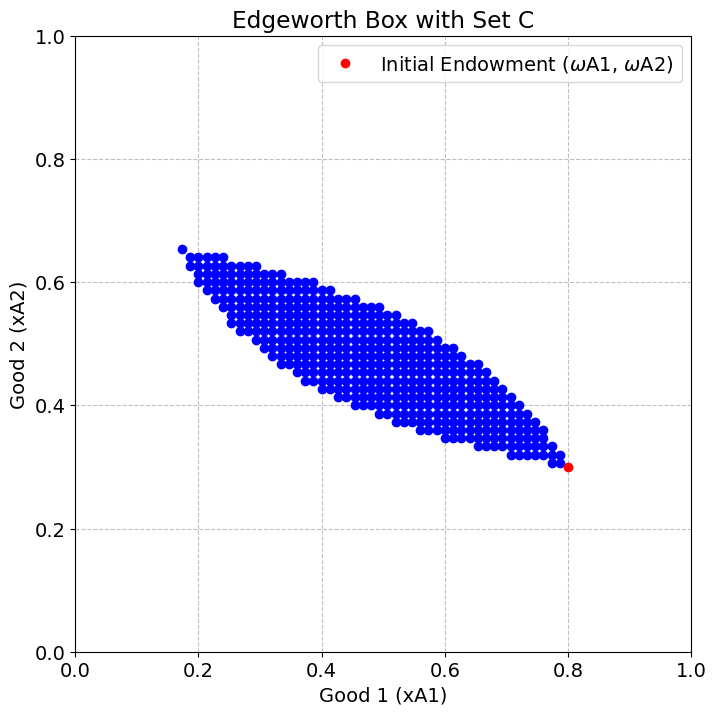

In [16]:
# 1
import matplotlib.pyplot as plt
from types import SimpleNamespace
import numpy as np

plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

class ExchangeEconomyClass:

    def __init__(self):

        par = self.par = SimpleNamespace()

        # a. preferences
        par.alpha = 1/3
        par.beta = 2/3

        # b. endowments
        par.w1A = 0.8
        par.w2A = 0.3

    def utility_A(self, x1A, x2A):
        par = self.par
        return (x1A ** par.alpha) * (x2A ** par.beta)

    def utility_B(self, x1B, x2B):
        par = self.par
        return (x1B ** par.alpha) * (x2B ** par.beta)

    def demand_A(self, p1):
        par = self.par
        return par.alpha * (par.w1A / p1), par.beta * (par.w2A / p1)

    def demand_B(self, p1):
        par = self.par
        return par.alpha * ((1 - par.w1A) / p1), par.beta * ((1 - par.w2A) / p1)

    def check_market_clearing(self, p1):
        par = self.par
        x1A, x2A = self.demand_A(p1)
        x1B, x2B = self.demand_B(p1)
        eps1 = x1A - par.w1A + x1B - (1 - par.w1A)
        eps2 = x2A - par.w2A + x2B - (1 - par.w2A)
        return eps1, eps2


# Initialize ExchangeEconomyClass
model = ExchangeEconomyClass()

# Define the set C
def in_set_C(x1A, x2A):
    return model.utility_A(x1A, x2A) >= model.utility_A(model.par.w1A, model.par.w2A) and \
           model.utility_B(1 - x1A, 1 - x2A) >= model.utility_B(1 - model.par.w1A, 1 - model.par.w2A)

# Plot Edgeworth box and set C
plt.figure(figsize=(8, 8))
N = 75
allocations = np.linspace(0, 1, N + 1)

for x1A in allocations:
    for x2A in allocations:
        if in_set_C(x1A, x2A):
            plt.plot(x1A, x2A, 'bo')

plt.plot(model.par.w1A, model.par.w2A, 'ro', label='Initial Endowment ($\omega$A1, $\omega$A2)')
plt.xlabel('Good 1 (xA1)')
plt.ylabel('Good 2 (xA2)')
plt.title('Edgeworth Box with Set C')
plt.grid(True)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.show()

In [17]:
# 2
import numpy as np

# Initialize ExchangeEconomyClass
model = ExchangeEconomyClass()

# Define the range of p1
N = 75
p1_range = np.linspace(0.5, 2.5, 5*N + 1)

# Initialize lists to store errors
errors_1 = []
errors_2 = []

# Calculate errors for each p1 in the range
for p1 in p1_range:
    eps1, eps2 = model.check_market_clearing(p1)
    errors_1.append(eps1)
    errors_2.append(eps2)

# Print errors
print("Errors in market clearing conditions:")
for i, p1 in enumerate(p1_range):
    print(f"p1 = {p1:.4f}, ε1 = {errors_1[i]:.4f}, ε2 = {errors_2[i]:.4f}")

Errors in market clearing conditions:
p1 = 0.5000, ε1 = -0.3333, ε2 = 0.3333
p1 = 0.5053, ε1 = -0.3404, ε2 = 0.3193
p1 = 0.5107, ε1 = -0.3473, ε2 = 0.3055
p1 = 0.5160, ε1 = -0.3540, ε2 = 0.2920
p1 = 0.5213, ε1 = -0.3606, ε2 = 0.2788
p1 = 0.5267, ε1 = -0.3671, ε2 = 0.2658
p1 = 0.5320, ε1 = -0.3734, ε2 = 0.2531
p1 = 0.5373, ε1 = -0.3797, ε2 = 0.2407
p1 = 0.5427, ε1 = -0.3857, ε2 = 0.2285
p1 = 0.5480, ε1 = -0.3917, ε2 = 0.2165
p1 = 0.5533, ε1 = -0.3976, ε2 = 0.2048
p1 = 0.5587, ε1 = -0.4033, ε2 = 0.1933
p1 = 0.5640, ε1 = -0.4090, ε2 = 0.1820
p1 = 0.5693, ε1 = -0.4145, ε2 = 0.1710
p1 = 0.5747, ε1 = -0.4200, ε2 = 0.1601
p1 = 0.5800, ε1 = -0.4253, ε2 = 0.1494
p1 = 0.5853, ε1 = -0.4305, ε2 = 0.1390
p1 = 0.5907, ε1 = -0.4357, ε2 = 0.1287
p1 = 0.5960, ε1 = -0.4407, ε2 = 0.1186
p1 = 0.6013, ε1 = -0.4457, ε2 = 0.1086
p1 = 0.6067, ε1 = -0.4505, ε2 = 0.0989
p1 = 0.6120, ε1 = -0.4553, ε2 = 0.0893
p1 = 0.6173, ε1 = -0.4600, ε2 = 0.0799
p1 = 0.6227, ε1 = -0.4647, ε2 = 0.0707
p1 = 0.6280, ε1 = -0.4692,

In [18]:
# 3
# Find the index of the minimum absolute error
min_abs_error_index = np.argmin(np.abs(np.array(errors_1)) + np.abs(np.array(errors_2)))

# Get the corresponding market clearing price
market_clearing_price = p1_range[min_abs_error_index]

print("Market clearing price:", market_clearing_price)

Market clearing price: 0.6653333333333333


In [19]:
# 4a
# Initialize ExchangeEconomyClass
model = ExchangeEconomyClass()

# Define the range of p1
N = 75
p1_range = np.linspace(0.5, 2.5, 5*N + 1)

# Initialize lists to store utilities
utility_values = []

# Calculate utilities for each p1 in the range
for p1 in p1_range:
    x1B, x2B = model.demand_B(p1)
    utility_values.append(np.sqrt((1 - x1B) * (1 - x2B)))

# Find the index of the maximum utility
max_utility_index = np.argmax(utility_values)

# Get the corresponding price and allocation
optimal_price = p1_range[max_utility_index]
optimal_allocation = model.demand_A(optimal_price)

print("Optimal price:", optimal_price)
print("Optimal allocation for agent A (xA1, xA2):", optimal_allocation)

Optimal price: 2.5
Optimal allocation for agent A (xA1, xA2): (0.10666666666666666, 0.07999999999999999)


In [20]:
# 4b første 
from scipy.optimize import minimize_scalar

# Define the utility function to maximize
def utility_to_maximize(p1):
    x1B, x2B = model.demand_B(p1)
    return -np.sqrt((1 - x1B) * (1 - x2B))  # Negated because we're minimizing

# Find the maximum utility (minimized negated utility)
res = minimize_scalar(utility_to_maximize, bounds=(0.01, 10), method='bounded')

# Get the optimal price and allocation
optimal_price_any = res.x
optimal_allocation_any = model.demand_A(optimal_price_any)

print("Optimal price with any positive price:", optimal_price_any)
print("Optimal allocation for agent A with any positive price (xA1, xA2):", optimal_allocation_any)

Optimal price with any positive price: 9.999996233369668
Optimal allocation for agent A with any positive price (xA1, xA2): (0.026666676711018, 0.0200000075332635)


In [21]:
# 4b alternativ
from scipy.optimize import minimize

# Define the negative of the utility function to maximize
def neg_utility_to_maximize(p1):
    x1B, x2B = model.demand_B(p1)
    return -np.sqrt((1 - x1B) * (1 - x2B))  # Negated because we're minimizing

# Find the maximum utility (minimized negated utility)
res = minimize(neg_utility_to_maximize, x0=0.5, method='Nelder-Mead')

# Get the optimal price and allocation
optimal_price_any = res.x[0]
optimal_allocation_any = model.demand_A(optimal_price_any)

print("Optimal price with any positive price:", optimal_price_any)
print("Optimal allocation for agent A with any positive price (xA1, xA2):", optimal_allocation_any)

Optimal price with any positive price: 1801439850948202.2
Optimal allocation for agent A with any positive price (xA1, xA2): (1.480297366166872e-16, 1.1102230246251541e-16)


In [22]:
# 5a
# Define the set C
C = []

# Define the conditions for belonging to set C
def in_set_C(xA1, xA2):
    return model.utility_A(xA1, xA2) >= model.utility_A(model.par.w1A, model.par.w2A) and \
           model.utility_B(1 - xA1, 1 - xA2) >= model.utility_B(1 - model.par.w1A, 1 - model.par.w2A)

# Populate set C
for xA1 in allocations:
    for xA2 in allocations:
        if in_set_C(xA1, xA2):
            C.append((xA1, xA2))

# Initialize variables to store maximum utility and corresponding allocation
max_utility = -float('inf')
optimal_allocation_C = None

# Iterate over points in set C and find the point with maximum utility
for xA1, xA2 in C:
    utility = model.utility_A(xA1, xA2)
    if utility > max_utility:
        max_utility = utility
        optimal_allocation_C = (xA1, xA2)

print("Optimal allocation within set C for agent A (xA1, xA2):", optimal_allocation_C)

Optimal allocation within set C for agent A (xA1, xA2): (0.5466666666666667, 0.5333333333333333)


In [23]:
# 5b
from scipy.optimize import minimize

# Define the negative of the utility function to maximize
def neg_utility_to_maximize(x):
    xA1, xA2 = x
    return -model.utility_A(xA1, xA2)  # Negated because we're maximizing

# Define the constraint function
def constraint_func(x):
    xA1, xA2 = x
    return model.utility_B(1 - xA1, 1 - xA2) - model.utility_B(model.par.w1A, model.par.w2A)

# Define the bounds for xA1 and xA2
bounds = [(0, 1), (0, 1)]

# Define the constraint dictionary
constraint = {'type': 'ineq', 'fun': constraint_func}

# Perform the optimization
res = minimize(neg_utility_to_maximize, x0=[0.5, 0.5], bounds=bounds, constraints=constraint)

# Get the optimal allocation
optimal_allocation = res.x

print("Optimal allocation without further restrictions for agent A (xA1, xA2):", optimal_allocation)

Optimal allocation without further restrictions for agent A (xA1, xA2): [0.58398297 0.58398338]


In [24]:
# 6a
# Define the function to maximize (negative because we minimize by default)
def neg_utility_to_maximize(x):
    xA1, xA2 = x
    return -(model.utility_A(xA1, xA2) + model.utility_B(1 - xA1, 1 - xA2))

# Define the bounds for xA1 and xA2
bounds = [(0, 1), (0, 1)]

# Perform the optimization
res = minimize(neg_utility_to_maximize, x0=[0.5, 0.5], bounds=bounds)

# Get the optimal allocation
optimal_allocation = res.x

print("Resulting allocation chosen by the social planner (xA1, xA2):", optimal_allocation)


Resulting allocation chosen by the social planner (xA1, xA2): [0.5 0.5]


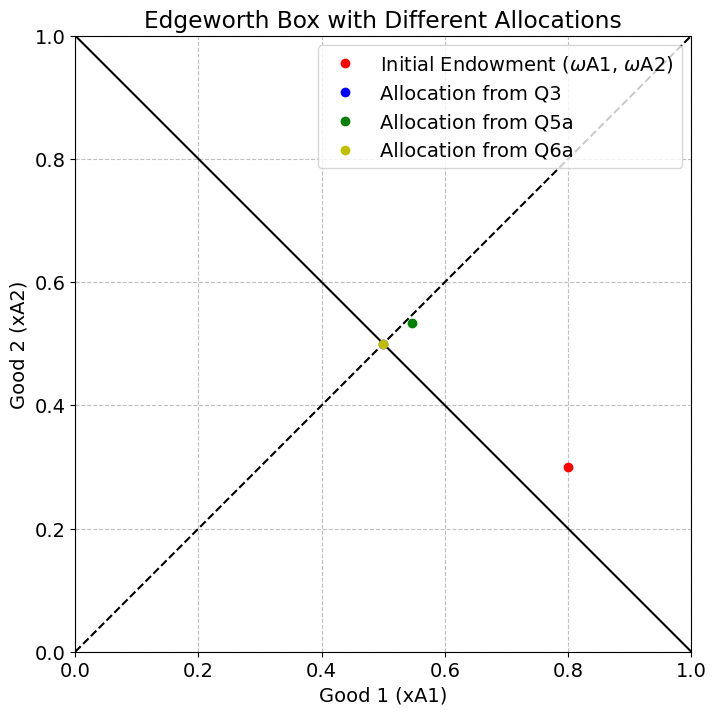

In [25]:
# 6b
# Define initial endowment
ωA1 = 0.8
ωA2 = 0.3

# Obtain allocations
allocation_3 = optimal_allocation
allocation_5a = optimal_allocation_C
allocation_6a = optimal_allocation

# Plot Edgeworth box and allocations
plt.figure(figsize=(8, 8))
plt.plot([0, 1], [1, 0], 'k')  # Budget line
plt.plot([0, 1], [0, 1], 'k--')  # 45-degree line
plt.xlabel('Good 1 (xA1)')
plt.ylabel('Good 2 (xA2)')
plt.title('Edgeworth Box with Different Allocations')

# Plot initial endowment point
plt.plot(ωA1, ωA2, 'ro', label='Initial Endowment ($\omega$A1, $\omega$A2)')

# Plot allocations
plt.plot(allocation_3[0], allocation_3[1], 'bo', label='Allocation from Q3')
plt.plot(allocation_5a[0], allocation_5a[1], 'go', label='Allocation from Q5a')
plt.plot(allocation_6a[0], allocation_6a[1], 'yo', label='Allocation from Q6a')

plt.legend()
plt.grid(True)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


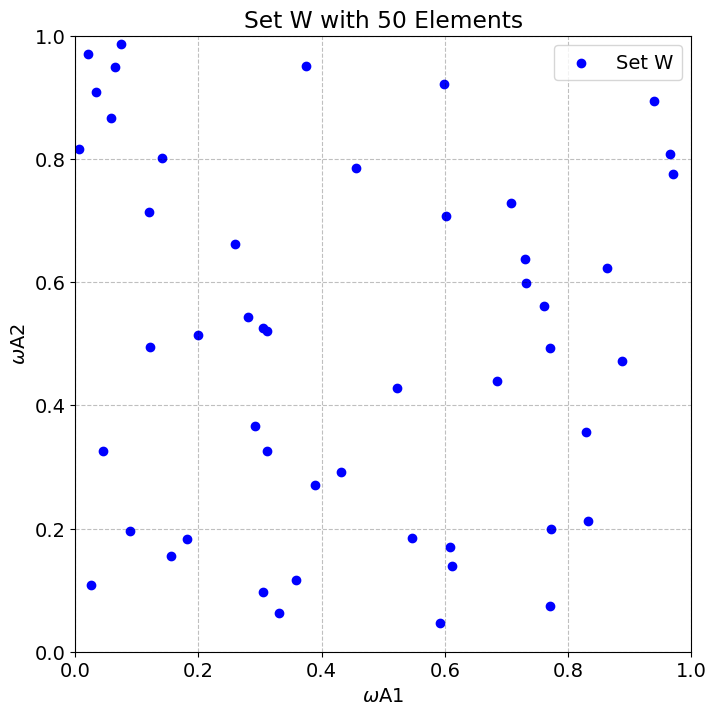

In [26]:
# 7
# Set the seed for reproducibility
np.random.seed(42)

# Number of elements in the set W
num_elements = 50

# Generate random pairs (ωA1, ωA2)
W = np.random.rand(num_elements, 2)

# Plot the set W
plt.figure(figsize=(8, 8))
plt.scatter(W[:, 0], W[:, 1], c='blue', label='Set W')
plt.xlabel('$\omega$A1')
plt.ylabel('$\omega$A2')
plt.title('Set W with 50 Elements')
plt.legend()
plt.grid(True)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


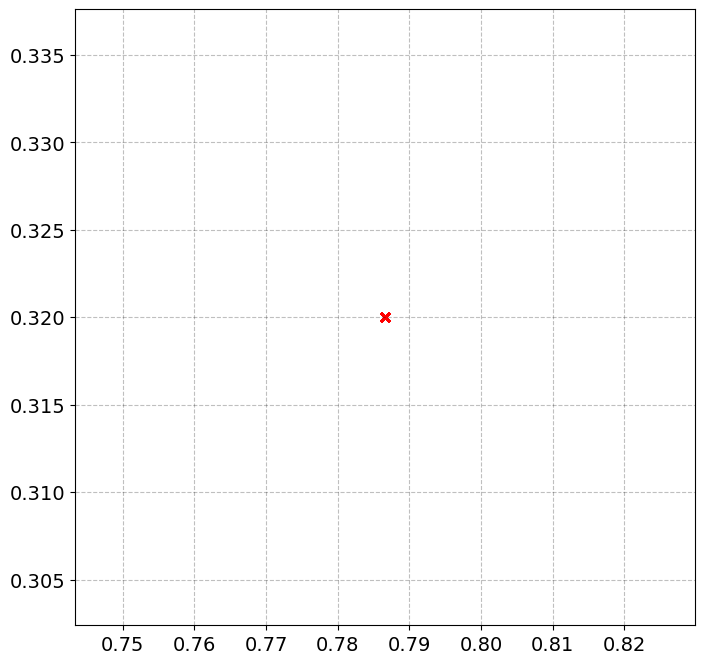

In [48]:
# Assuming you have already defined and instantiated your economic model class 'Model'

# Initialize lists to store market equilibrium allocations
market_eq_allocations = []

# Calculate market equilibrium allocation for each ωA ∈ W
for ωA in W:
    # Unpack ωA1 and ωA2 from the current element of W
    ωA1, ωA2 = ωA
    
    # Calculate market equilibrium allocation for the current endowment
    # You need to implement this part based on your economic model
    # For example:
    # xA1, xA2 = model.calculate_market_equilibrium_allocation(ωA1, ωA2)
    
    # Append the market equilibrium allocation to the list
    market_eq_allocations.append((xA1, xA2))

# Convert market_eq_allocations to numpy array
market_eq_allocations = np.array(market_eq_allocations)

# Plot the Edgeworth box with market equilibrium allocations
plt.figure(figsize=(8, 8))
# Plot the Edgeworth box (e.g., 45-degree line, budget line)
# Add labels, title, legend, grid, etc.
# Plot initial endowment points (W)
# Plot market equilibrium allocations
plt.scatter(market_eq_allocations[:, 0], market_eq_allocations[:, 1], c='red', label='Market Equilibrium Allocations', marker='x')
plt.show()
